In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.io import loadmat
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

import seaborn as sns
sns.set_style('white')

In [2]:
# 데이터를 로드 합니다.
data1 = loadmat("resources/data1.mat")
# 로드한 데이터의 key 값을 확인합니다.
print(data1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])


In [3]:
# 데이터 중 실제 데이터에 해당하는 X 값을 변수에 저장합니다.
X = data1['X']

In [4]:
# X 값을 확인합니다.
X = data1['X']
print('X:', X.shape)

X: (307, 2)


In [5]:
# gaussian 분포를 이용하여 Outlier를 검출하는 EllipticEnvelope 객체를 선언합니다.
clf = EllipticEnvelope()
# 학습 데이터 X를 이용하여 gaussian 분포를 학습합니다.
clf.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [22]:
# Calculate the decision function and use threshold to determine outliers
# decision_function을 이용하여 Mahalanobis distances를 구합니다.
y_pred = clf.decision_function(X).ravel()
# outlier를 백분위에서 얼마나 낮은 값이하로 설정할지 임계값을 정합니다. 
# percentile은 0 ~ 100 사이로 입력해야 하며 outlier검출 목적상 작은 값이어야 합니다.
percentile = 2
# y_pred에서 percentile 에 해당하는 값(threshold)를 구합니다.
threshold = np.percentile(y_pred, percentile)
# threshold 값보다 작은 값들의 index를 구합니다.
outliers = y_pred < threshold

In [26]:
print("Outlier 갯수 : ", np.count_nonzero(outliers))

Outlier 갯수 :  7


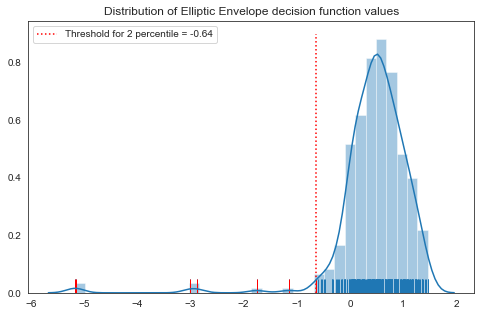

In [28]:
# plot을 설정합니다.
fig, ax = plt.subplots(figsize=(8,5))

# decision function의 결과인 y_pred에 대한 분포를 그래프에 표시합니다.
sns.distplot(y_pred, rug = True, ax=ax)

# outliter를 그래프에 표시합니다.
sns.distplot(y_pred[outliers], rug=True, hist=False, kde=False, norm_hist=True, color='r', ax=ax)

ax.vlines(threshold, 0, 0.9, colors='r', linestyles='dotted',
           label='Threshold for {} percentile = {}'.format(percentile, np.round(threshold, 2)))

ax.set_title('Distribution of Elliptic Envelope decision function values');

ax.legend(loc='best')